In [69]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

home_df = pd.read_csv('home_data.csv')

home_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


## Create a simple regression model of sqft_living to price

Split data into training and testing.

In [70]:
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(home_df, test_size=0.2, random_state=42)

In [71]:
train_data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
6325,5467910190,20140527T000000,325000,3,1.75,1780,13095,1.0,0,0,...,9,1780,0,1983,0,98042,47.3670,-122.152,2750,13095
13473,9331800580,20150310T000000,257000,2,1.00,1000,3700,1.0,0,0,...,6,800,200,1929,0,98118,47.5520,-122.290,1270,5000
17614,2407000405,20150226T000000,228500,3,1.00,1080,7486,1.5,0,0,...,6,990,90,1942,0,98146,47.4838,-122.335,1170,7800
16970,5466700290,20150108T000000,288000,3,2.25,2090,7500,1.0,0,0,...,7,1280,810,1977,0,98031,47.3951,-122.172,1800,7350
20868,3026059361,20150417T000000,479000,2,2.50,1741,1439,2.0,0,0,...,8,1446,295,2007,0,98034,47.7043,-122.209,2090,10454


In [72]:
test_data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
735,2591820310,20141006T000000,365000,4,2.25,2070,8893,2.0,0,0,...,8,2070,0,1986,0,98058,47.4388,-122.162,2390,7700
2830,7974200820,20140821T000000,865000,5,3.00,2900,6730,1.0,0,0,...,8,1830,1070,1977,0,98115,47.6784,-122.285,2370,6283
4106,7701450110,20140815T000000,1038000,4,2.50,3770,10893,2.0,0,2,...,11,3770,0,1997,0,98006,47.5646,-122.129,3710,9685
16218,9522300010,20150331T000000,1490000,3,3.50,4560,14608,2.0,0,2,...,12,4560,0,1990,0,98034,47.6995,-122.228,4050,14226
19964,9510861140,20140714T000000,711000,3,2.50,2550,5376,2.0,0,0,...,9,2550,0,2004,0,98052,47.6647,-122.083,2250,4050


## Build the regression model using only sqft_living as a feature

In [73]:
from sklearn.linear_model import LinearRegression

sqft_lin_reg_model = LinearRegression().fit(np.array([train_data['sqft_living']]).T, np.array([train_data['price']]).T)

## Evaluate the simple model

In [74]:
test_data['price'].mean()

549367.4450613001

In [75]:
from sklearn.metrics import mean_squared_error
from math import sqrt

sqft_y_predict = sqft_lin_reg_model.predict(np.array([test_data['sqft_living']]).T)

print("Root mean squared error: %.2f"
      % sqrt(mean_squared_error(test_data['price'], sqft_y_predict)))


Root mean squared error: 276559.18


## Let's show what our predictions look like

<IPython.core.display.Javascript object>


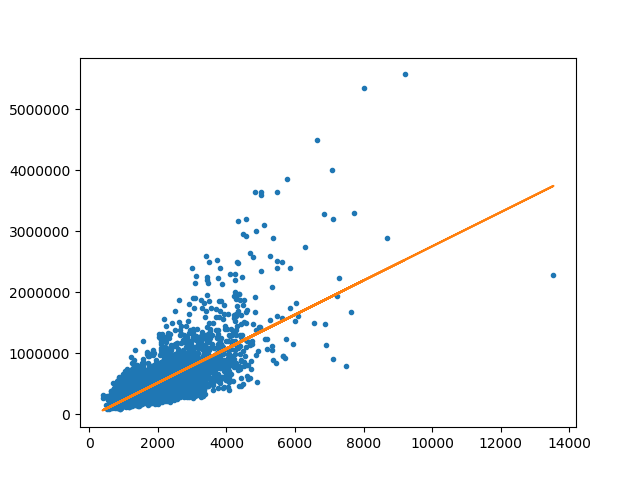

In [76]:
plt.figure()

plt.plot(test_data['sqft_living'],test_data['price'],'.',
        test_data['sqft_living'],sqft_y_predict,'-')

plt.show()

<IPython.core.display.Javascript object>


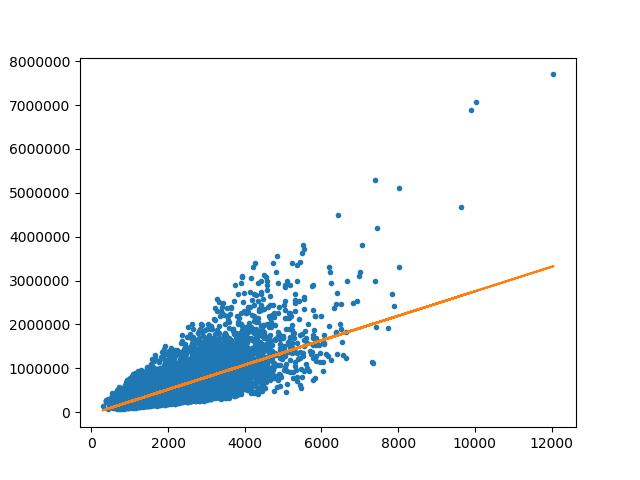

In [77]:
plt.figure()

plt.plot(train_data['sqft_living'],train_data['price'],'.',
        train_data['sqft_living'],sqft_lin_reg_model.predict(np.array([train_data['sqft_living']]).T),'-')

plt.show()

In [78]:
print("intercept:", sqft_lin_reg_model.intercept_[0])
print("slope:", sqft_lin_reg_model.coef_[0][0])

intercept: -41999.1845423
slope: 279.554778509


## Build a regression model with more features

In [79]:
my_features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'zipcode']

myfeatures_lin_reg_model = LinearRegression().fit(train_data[my_features], train_data['price'])


myfeatures_y_predict = myfeatures_lin_reg_model.predict(test_data[my_features])

print("sqft: Root mean squared error: %.2f"
      % sqrt(mean_squared_error(test_data['price'], sqft_y_predict)))
print("myfeatures: Root mean squared error: %.2f"
      % sqrt(mean_squared_error(test_data['price'], myfeatures_y_predict)))

sqft: Root mean squared error: 276559.18
myfeatures: Root mean squared error: 270717.19


## Apply learned models to predict prices of 3 houses
The first house we will use is considered an "average" house in Seattle.

In [80]:
home1 = home_df[home_df['id'] == 5309101200]

home1.T

,1054
id,5309101200
date,20140605T000000
price,620000
bedrooms,4
bathrooms,2.25
sqft_living,2400
sqft_lot,5350
floors,1.5
waterfront,0
view,0


In [81]:
home1['price']

1054    620000
Name: price, dtype: int64

In [82]:
sqft_lin_reg_model.predict(np.array(home1['sqft_living'])[0])[0][0]

628932.28388040815

In [83]:
myfeatures_lin_reg_model.predict(home1[my_features])[0]

632032.3913852796

## Prediction for a second, fancier house
We will now examine the predictions for a fancier house.

In [84]:
home2 = home_df[home_df['id'] == 1925069082]

home2.T

,1361
id,1925069082
date,20150511T000000
price,2200000
bedrooms,5
bathrooms,4.25
sqft_living,4640
sqft_lot,22703
floors,2
waterfront,1
view,4


In [85]:
home2['price']

1361    2200000
Name: price, dtype: int64

In [86]:
sqft_lin_reg_model.predict(np.array(home2['sqft_living'])[0])[0][0]

1255134.987741597

In [87]:
myfeatures_lin_reg_model.predict(home2[my_features])[0]

1263455.293098785

## Last house, super fancy
Our last house is a very large one owned by a famous Seattleite.

In [88]:
bill_gates = {'bedrooms':[8], 
              'bathrooms':[25], 
              'sqft_living':[50000], 
              'sqft_lot':[225000],
              'floors':[4], 
              'zipcode':['98039'], 
              'condition':[10], 
              'grade':[10],
              'waterfront':[1],
              'view':[4],
              'sqft_above':[37500],
              'sqft_basement':[12500],
              'yr_built':[1994],
              'yr_renovated':[2010],
              'lat':[47.627606],
              'long':[-122.242054],
              'sqft_living15':[5000],
              'sqft_lot15':[40000]}

In [89]:
bill_gates_home = pd.DataFrame(bill_gates)

bill_gates_home

,bathrooms,bedrooms,condition,floors,grade,lat,long,sqft_above,sqft_basement,sqft_living,sqft_living15,sqft_lot,sqft_lot15,view,waterfront,yr_built,yr_renovated,zipcode
0,25,8,10,4,10,47.627606,-122.242054,37500,12500,50000,5000,225000,40000,4,1,1994,2010,98039


In [90]:
myfeatures_lin_reg_model.predict(bill_gates_home[my_features])[0]

15553462.175941445